# Auto Encoder One Class Support Vector Machine Outlier Detector (AE-1SVM-OD)

----

**Created by**:

- **Author**: Dr. Saad Laouadi
- **Date**: 15/08/2024

This notebook was created by dr. Saad Laouadi on August 15th, 2024 as part of a series on anomaly detection algorithms. The content is designed for researchers, data scientists, and practitioners interested in applying the Auto-Encoder One Class Support Vector Machine algorithm to identify anomalies in diverse datasets.

**Copyright**

**© 2024 Dr. Saad Laouadi. All rights reserved.**

---

## Table of Contents
1. [Objective](#Objective)
2. [Prerequisites](#Prerequisites)
3. [Installing PyTorch](#installing-pytorch)
4. [Theoretical Background of AE-1SVM-OD](#theoretical-background-of-ae-1svm-od)
   - 4.1. [Introduction](#introduction)
   - 4.2. [Core Components](#core-components)
     - 4.2.1. [Auto-Encoder Architecture](#auto-encoder-architecture)
     - 4.2.2. [One-Class Support Vector Machine](#one-class-support-vector-machine)
     - 4.2.3. [Latent Space Representation](#latent-space-representation)
     - 4.2.4. [Decision Function](#decision-function)
5. [Theoretical Underpinnings](#theoretical-underpinnings)
   - 5.1. [Manifold Learning and Representation Theory](#manifold-learning-and-representation-theory)
   - 5.2. [Statistical Learning Theory](#statistical-learning-theory)
   - 5.3. [Information Theory](#information-theory)
6. [Mathematical Framework](#mathematical-framework)
   - 6.1. [Auto-Encoder Model](#auto-encoder-model)
   - 6.2. [One-Class SVM Formulation](#one-class-svm-formulation)
   - 6.3. [Decision Function](#decision-function)
   - 6.4. [Anomaly Score Calculation](#anomaly-score-calculation)
7. [Computational Complexity](#computational-complexity)
   - 7.1. [Auto-encoder Training Complexity](#auto-encoder-training-complexity)
   - 7.2. [1SVM Training Complexity](#1svm-training-complexity)
   - 7.3. [Inference Complexity](#inference-complexity)
8. [Using AE-1SVM for Outlier Detection Using PyOD Framework](#using-ae-1svm-for-outlier-detection-using-pyod-framework)
   - 8.1. [Key Parameters of AE-1SVM](#key-parameters-of-ae-1svm)
   - 8.2. [Methods in AE-1SVM](#methods-in-ae-1svm)
   - 8.3. [Training Workflow for AE-1SVM](#training-workflow-for-ae-1svm)
9. [Practical Example of AE-1SVM System with Simulated Data](#practical-example-of-ae-1svm-system-with-simulated-data)
10. [Real-World Example](#real-world-example)
   - 10.1. [AE-1SVM Outlier Detection Workflow](#ae-1svm-outlier-detection-workflow)
   - 10.2. [Configuring the AE-1SVM](#configuring-the-ae-1svm)
11. [Training AE-1SVM as an Unsupervised Problem](#training-ae-1svm-as-an-unsupervised-problem)

## Objective

The primary objective of this notebook is to provide a comprehensive exploration of the **AutoEncoder One Class Support Vector Machine (AE-1SVM)** algorithm, encompassing its theoretical foundations, practical implementation, and performance evaluation. Specifically, this notebook aims to:

1. **Elucidate the Theoretical Framework**: Present a detailed explanation of the underlying principles of auto-encoders combined with One Class Support Vector Machines, including the hybrid architecture, loss functions, and optimization techniques that leverage both unsupervised and semi-supervised learning approaches.

2. **Demonstrate Practical Implementation**: Guide readers through the step-by-step process of implementing AE-OCSVM using popular machine learning libraries, with a focus on integrating autoencoder feature extraction with OCSVM classification efficiently.

3. **Explore Hyperparameter Tuning**: Investigate the impact of various hyperparameters on AE-OCSVM's performance, providing insights into optimal configuration for both the autoencoder and OCSVM components across different types of datasets.

4. **Analyze Performance**: Evaluate AE-OCSVM's effectiveness in detecting anomalies using both synthetic and real-world datasets, employing appropriate evaluation metrics and visualization techniques that highlight the synergy between dimensionality reduction and one-class classification.

5. **Compare with Other Techniques**: Benchmark AE-OCSVM against traditional anomaly detection methods and standalone autoencoders or OCSVMs to highlight its strengths in handling high-dimensional and complex data distributions.

6. **Discuss Real-World Applications**: Present case studies demonstrating AE-OCSVM's applicability in various domains, such as network intrusion detection, industrial process monitoring, or medical diagnosis, where feature extraction and robust classification are crucial.

7. **Address Challenges and Limitations**: Discuss potential challenges in implementing AE-OCSVM, including computational complexity, the balance between autoencoder reconstruction and OCSVM margin optimization, and interpretability of the hybrid model's decisions.

By the end of this notebook, readers will have gained a thorough understanding of the AutoEncoder One Class Support Vector Machine, equipped with the knowledge and practical skills to apply this advanced hybrid algorithm effectively in their own anomaly detection tasks across diverse datasets and domains, particularly where feature learning and robust decision boundaries are paramount.

### Prerequisites

This notebook assumes a foundational understanding of Python tools for data manipulation and processing. The following prerequisites will help you get the most out of this material:

1. **Data Manipulation**:
   - Familiarity with reading and writing data using libraries such as **Pandas** and **NumPy**.

2. **Machine Learning Workflow**:
   - Prior experience with the **Scikit-learn** library, including:
     - Preprocessing techniques like scaling and normalization.
     - Splitting data into training and test sets using tools like `train_test_split`.

3. **Data Visualization**:
   - Proficiency in using plotting libraries such as **Matplotlib** and **Seaborn** for visualizing data and model results.

4. **Deep Learning Frameworks**:
   - Familiarity with autoencoders and experience using deep learning frameworks like **TensorFlow** or **PyTorch** for model development and training.

In [1]:
# ============================================================================================# 
#                                 Environment Setup
#  Here we import all the necessary modules and tools we will use through this notebook
# ============================================================================================# 
import os
import sys
import time
from collections import Counter

import numpy as np 
import pandas as pd
from scipy.io import arff

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

from pyod.models.ae1svm import AE1SVM

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

# The utils module is not an installable package, it is the same directory as this notebook
from utils import generate_data, visualize_data, apply_abod, apply_abod_advanced, precision_at_rank_n
from utils import grid_search_abod, hyperopt_objective, plot_outliers_vs_inliers
from utils import preprocess_pipeline

from suod_utils import generate_sample_data, evaluate_model, visualize_results

from pyod.models.suod import SUOD
from pyod.models.lof import LOF
from pyod.models.iforest import IForest
from pyod.models.copod import COPOD
from pyod.models.knn import KNN
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data, get_outliers_inliers, evaluate_print
from pyod.utils.example import visualize

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope

def print_banner(sep, nchar, title):
    print(sep * nchar)
    print(title.center(nchar))
    print(sep * nchar)

# Configuration 
DATA_PATH = "../../datasets/HeartDisease/HeartDisease_withoutdupl_norm_44.arff"

### Installing `PyTorch`
In this notebook we will discuss the Auto-Encoder One Class Support Vector Machine Outlier Detector. If you intend to run the examples in this notebook, you need to set up your environment first. Here will state the steps. 

You can install `PyTorch` in your active environment using either `conda` or `pip`, depending on your preference:

- **Using Conda**:
  If you are managing your Python environment with `conda`, you can install `PyTorch` by running the following command:

  ```sh
  conda install pytorch -c pytorch
  ```
- **Using pip**
  Alternatively, if you prefer using pip, you can install PyTorch with the following command:
  ```sh
  pip install torch
  ```

After installation, verify that PyTorch is correctly installed by importing it in your Python environment:

```python
import torch
print(torch.__vision__)
```

This will display the version of PyTorch installed, ensuring that the framework is ready for use in training your AEOD model.

> **⚠️ Important Notice:**
> 
> At the time of writing, the AE1SVM model class is not available for installation via PyPI or from the main branch on GitHub. To use this model, you must install the development version of `pyod`.

**Here is how can do that**

```sh
pip install git+https://github.com/yzhao062/pyod.git@development
```


# Theoretical Background of AE-1SVM-OD

## 1. Introduction

The Auto Encoder One Class Support Vector Machine Outlier Detector (AE-1SVM-OD) is an advanced hybrid algorithm that combines the strengths of auto-encoders (AE) and one-class support vector machines (1SVM) for robust anomaly detection. This unsupervised learning approach is designed to handle complex, high-dimensional datasets where traditional methods may fall short.

The AE-1SVM-OD leverages the dimensionality reduction and feature learning capabilities of auto-encoders, coupled with the powerful decision boundary construction of one-class SVMs. This synergy allows for more nuanced and accurate anomaly detection, especially in scenarios where the distinction between normal and anomalous data points is subtle or non-linear.

The core principle of AE-1SVM-OD lies in its two-stage approach: first, using an auto-encoder to learn a compact, meaningful representation of the data, and then applying a one-class SVM to this learned representation to identify anomalies. This combination allows the algorithm to capture complex data structures while maintaining a clear decision boundary for anomaly classification.

## 2. Core Components

### 2.1 Auto-Encoder Architecture

The auto-encoder in AE-1SVM-OD consists of:

- An encoder network that compresses input data into a lower-dimensional latent space
- A decoder network that reconstructs the original input from the latent representation
- A bottleneck layer representing the compressed data features

### 2.2 One-Class Support Vector Machine

The 1SVM component includes:

- A kernel function for mapping data to a high-dimensional feature space
- An optimization problem to find the maximal margin hyperplane that separates the data from the origin in the feature space

### 2.3 Latent Space Representation

The latent space created by the auto-encoder serves as the input to the 1SVM, providing a more informative and compact representation of the original data.

### 2.4 Decision Function

The 1SVM constructs a decision function that determines whether a point in the latent space is an inlier or an outlier.

## 3. Theoretical Underpinnings

### 3.1 Manifold Learning and Representation Theory

AE-1SVM-OD builds on the concept of manifold learning, assuming that high-dimensional data often lies on or near a lower-dimensional manifold. The auto-encoder learns to approximate this manifold, while the 1SVM operates on this learned representation.

### 3.2 Statistical Learning Theory

The 1SVM component is grounded in statistical learning theory, particularly the principles of structural risk minimization and kernel methods. This provides a solid theoretical foundation for the algorithm's generalization capabilities.

### 3.3 Information Theory

Information theory concepts help explain the compression achieved by the auto-encoder and how this impacts the subsequent 1SVM classification. The information bottleneck in the auto-encoder forces the network to learn an efficient encoding of the input data.

## 4. Mathematical Framework

### 4.1 Auto-Encoder Model

Let $x$ be the input data, $f(x)$ be the encoder function, and $g(f(x))$ be the decoder function. The auto-encoder model is expressed as:

$$\hat{x} = g(f(x))$$

where $\hat{x}$ is the reconstructed data.

### 4.2 One-Class SVM Formulation

Given the latent representation $z = f(x)$, the 1SVM solves the following optimization problem:

$$\min_{w,\xi,\rho} \frac{1}{2}|w|^2 + \frac{1}{\nu n}\sum_{i=1}^n \xi_i - \rho$$

subject to $(w \cdot \phi(z_i)) \geq \rho - \xi_i$, $\xi_i \geq 0$

where $w$ is the normal vector to the hyperplane, $\xi_i$ are slack variables, $\rho$ is the margin, $\nu$ is a parameter controlling the trade-off between margin maximization and constraint violation, and $\phi$ is the kernel function.

### 4.3 Decision Function

The decision function for classifying a new point $z$ is:

$$f(z) = \text{sign}((w \cdot \phi(z)) - \rho)$$

### 4.4 Anomaly Score Calculation

The anomaly score $S$ for a data point $x$ can be calculated as a combination of the reconstruction error and the 1SVM decision function:

$$S(x) = \alpha|x - g(f(x))|^2 + \beta((w \cdot \phi(f(x))) - \rho)$$

where $\alpha$ and $\beta$ are weighting parameters.

## 5. Computational Complexity

The computational complexity of AE-1SVM-OD can be divided into three phases:

- **Auto-encoder training**: $O(N * E * M)$, where $N$ is the number of training samples, $E$ is the number of epochs, and $M$ is the auto-encoder model complexity.
- **1SVM training**: $O(N^2 * D)$ to $O(N^3 * D)$, where $D$ is the dimensionality of the latent space. This can vary based on the specific SVM implementation and optimization techniques used.
- **Inference**: $O(P + S)$, where $P$ is the number of parameters in the auto-encoder and $S$ is the number of support vectors in the 1SVM.

While the training phase can be computationally intensive, especially for large datasets, the inference phase is typically fast, making AE-1SVM-OD suitable for real-time anomaly detection in many applications.

---

The AE-1SVM-OD algorithm presents a powerful approach to anomaly detection by combining the strengths of auto-encoders and one-class SVMs. Its ability to handle complex, high-dimensional data while providing a clear decision boundary makes it a valuable tool in various domains, from cybersecurity to industrial process monitoring.

## Using AE-1SVM for Outlier Detection Using PyOD Framework

The `AE1SVM` class from the `pyod.models.ae1svm` module combines AutoEncoder (AE) with One-Class SVM for anomaly detection. This hybrid approach leverages the feature extraction capabilities of an AutoEncoder with the decision boundary of an SVM to detect outliers effectively. This model is particularly useful for detecting complex anomalies in high-dimensional datasets.

### Key Parameters of AE-1SVM

- **hidden_neurons**: Number of neurons in each hidden layer.
  - Type: `list` (default=[64, 32])
  - Example: `[64, 32]` configures the network with layers [input_size, 64, 32, 32, 64, input_size].

- **hidden_activation**: Activation function for the hidden layers.
  - Type: `str` (default='relu')

- **batch_norm**: Whether to apply batch normalization after each layer.
  - Type: `bool` (default=True)

- **learning_rate**: The learning rate for training the model.
  - Type: `float` (default=0.001)

- **epochs**: The number of epochs for training the model.
  - Type: `int` (default=50)

- **batch_size**: The size of each training batch.
  - Type: `int` (default=32)

- **dropout_rate**: The dropout rate used for regularization.
  - Type: `float` (default=0.2)

- **weight_decay**: The L2 penalty (weight decay) for the optimizer.
  - Type: `float` (default=1e-5)

- **preprocessing**: Whether to apply standard scaling to the input data before training.
  - Type: `bool` (default=True)

- **loss_fn**: The loss function to use for reconstruction loss.
  - Type: `callable` (default=`torch.nn.MSELoss`)

- **contamination**: The proportion of outliers in the dataset.
  - Type: `float` (default=0.1)
  - Range: `(0, 0.5)`

- **alpha**: The weight for the reconstruction loss in the final loss computation.
  - Type: `float` (default=1.0)

- **sigma**: Scaling factor for the random Fourier features.
  - Type: `float` (default=1.0)

- **nu**: The parameter for the SVM loss.
  - Type: `float` (default=0.1)

- **kernel_approx_features**: The number of random Fourier features to approximate the kernel.
  - Type: `int` (default=1000)

### Methods in AE-1SVM

- **fit()**: Trains the AE-1SVM model on the provided data.
  - **Parameters**:
    - `X`: The input data to train on (ndarray of shape `(n_samples, n_features)`).
  - **Returns**:
    - `self`: The fitted AE-1SVM instance.
  - **Example**:
    ```python
    ae1svm.fit(X_train)
    ```

- **predict()**: Predicts whether each sample is an outlier or not.
  - **Parameters**:
    - `X`: The input data to predict (ndarray of shape `(n_samples, n_features)`).
    - `return_confidence`: If `True`, also returns the confidence of the prediction.
  - **Returns**:
    - `outlier_labels`: Binary labels for each sample (0 for inliers, 1 for outliers).
    - `confidence` (optional): Confidence of the prediction (only returned if `return_confidence=True`).
  - **Example**:
    ```python
    y_pred = ae1svm.predict(X_test)
    ```

- **decision_function()**: Computes the anomaly scores for the input data.
  - **Parameters**:
    - `X`: The input data to score (ndarray of shape `(n_samples, n_features)`).
  - **Returns**:
    - `anomaly_scores`: The anomaly scores for each sample (ndarray of shape `(n_samples,)`). Higher scores indicate a higher likelihood of being an outlier.
  - **Example**:
    ```python
    outlier_scores = ae1svm.decision_function(X_test)
    ```

### Training Workflow for AE-1SVM

Here are the steps to train an AE-1SVM model:

1. **Import the AE-1SVM Class**: Start by importing the `AE1SVM` class from `pyod.models.ae1svm`.
    ```python
    from pyod.models.ae1svm import AE1SVM
    ```

2. **Initialize the AE-1SVM**: Create an instance of the AE-1SVM class with the desired parameters.
    ```python
    ae1svm = AE1SVM(contamination=0.1, hidden_neurons=[64, 32], batch_norm=True, dropout_rate=0.2, epochs=50)
    ```

3. **Train the Model**: Fit the model to the training data.
    ```python
    ae1svm.fit(X_train)
    ```

4. **Make Predictions**: Use the `predict` method to classify data as inliers or outliers.
    ```python
    y_pred = ae1svm.predict(X_test)
    ```

5. **Get Outlier Scores**: Retrieve the anomaly scores using the `decision_function`.
    ```python
    outlier_scores = ae1svm.decision_function(X_test)
    ```

The AE-1SVM model combines the strengths of AutoEncoders and One-Class SVMs, making it a powerful tool for detecting outliers in complex datasets.

> **Note**: For more detailed information, you can refer to the [pyod documentation](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.ae1svm).

## Practical Example of AE-1SVM System with Simulated Data

In this section, we demonstrate the application of the AutoEncoder with One-Class SVM (AE-1SVM) system using simulated data. We will walk through the process of:

1. **Generating Sample Datasets**:
   - We start by creating or loading a synthetic dataset. This dataset will be used to train the AE-1SVM model and test its ability to detect outliers.

2. **Initializing the AE-1SVM Model**:
   - We configure the AE-1SVM model, setting up the AutoEncoder layers and SVM parameters. The model will combine the feature extraction power of the AutoEncoder with the decision boundary capability of the One-Class SVM.

3. **Training the AE-1SVM Model**:
   - We train the AE-1SVM model on the generated dataset. The AutoEncoder learns to compress and reconstruct the data, while the One-Class SVM identifies outliers based on the learned representations.

4. **Evaluating the System's Performance**:
   - After training, we assess the model's performance in identifying outliers. We evaluate the results using metrics such as precision, recall, and ROC AUC to understand how well the model performs.

5. **Visualizing the Results**:
   - Finally, we visualize the results to gain insights into the detected outliers. Visualization helps in interpreting the model's decisions and understanding the characteristics of the identified anomalies.

This example will provide a practical and hands-on understanding of how AE-1SVM can be effectively utilized for outlier detection in various applications.

2024-08-15 01:20:00.842 python3.12[95840:18670544] Metal API Validation Enabled


Epoch 10/50, Loss: 3.646641864858825
Epoch 20/50, Loss: 2.139112423206198
Epoch 30/50, Loss: 2.2721547381631257
Epoch 40/50, Loss: 2.168821941161978
Epoch 50/50, Loss: 2.1270561033281785
y_train has multiple classes: {np.float64(0.0), np.float64(1.0)}
y_test has multiple classes: {np.float64(0.0), np.float64(1.0)}

On Training Data:
AE-1SVM ROC:0.9861, precision @ rank n:0.9556

On Test Data:
AE-1SVM ROC:1.0, precision @ rank n:1.0


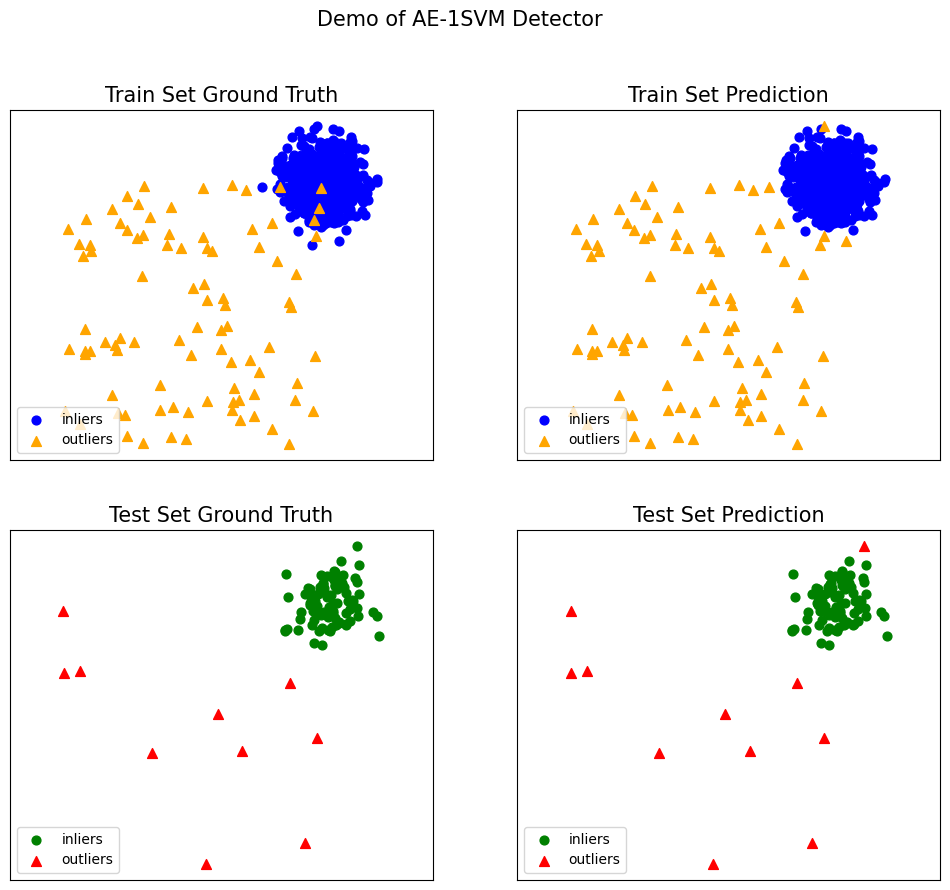

Process took 6.786064147949219 seconds.


In [2]:
# Configuration
PRINT_MODEL_INFO = False                        # Set this to True to print the AE-1SVM model summary

start = time.time()
if __name__ == "__main__":
    contamination = 0.1                          # Percentage of outliers
    n_train = 900                                # Number of training points
    n_test = 100                                 # Number of testing points

    # Generate synthetic data
    X_train, X_test, y_train, y_test = generate_sample_data(
        n_train=n_train, n_test=n_test, n_features=2, contamination=contamination, random_state=42
    )

    # Initialize the AE-1SVM model
    ae1svm = AE1SVM(
        contamination=contamination,
        hidden_neurons=[64, 32],
        hidden_activation='relu',
        batch_norm=True,
        dropout_rate=0.2,
        learning_rate=0.001,
        epochs=50,
        batch_size=32,
        weight_decay=1e-5,
        nu=0.1,
        sigma=1.0,
        kernel_approx_features=1000
    )

    # Train the AE-1SVM model
    ae1svm.fit(X_train)
    
    if PRINT_MODEL_INFO:
        print(ae1svm.model)                                               # Print the AE-1SVM model summary
         
    # Get predictions
    y_train_pred = ae1svm.predict(X_train)
    y_test_pred = ae1svm.predict(X_test)
    
    # Get outlier scores
    y_train_scores = ae1svm.decision_function(X_train)
    y_test_scores = ae1svm.decision_function(X_test)

    # Evaluate the model
    evaluate_model('AE-1SVM', y_train, y_train_scores, y_test, y_test_scores)

    # Visualize the results
    visualize_results('AE-1SVM', X_train, y_train, X_test, y_test, y_train_pred, y_test_pred)

end = time.time()

print(f"Process took {end - start} seconds.")

---

## Real-World Example

In this section, we will utilize the heart disease dataset, which has been employed in previous algorithm examples. For more detailed information about the dataset, please refer to the [ABOD algorithm notebook](03-abod-algorithm.ipynb) or visit [this link](https://www.dbs.ifi.lmu.de/research/outlier-evaluation/DAMI/semantic/HeartDisease/HeartDisease_44.html).

### AE1SVM Outlier Detection Workflow

To effectively leverage the AE1SVM model for outlier detection, follow these comprehensive steps:

1. **Data Preprocessing**:
   - **Handle Missing Data**: Impute or remove missing values to maintain the dataset's integrity.
   - **Eliminate Duplicates**: Remove duplicate entries to prevent bias in the outlier detection process.
   - **Encode Categorical Features**: Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.
   - **Scale Features**: Normalize or standardize features to ensure a uniform scale across all input variables, which is crucial for the AE1SVM model.
   - **Dimensionality Reduction** (Optional): Use techniques like PCA to reduce dimensionality, particularly when dealing with high-dimensional data.

2. **Applying the AE1SVM Model**:
   - **Initialize the AE1SVM Model**: Configure the AE1SVM model, specifying parameters such as hidden layers, learning rate, batch size, and epochs.
   - **Train the Model**: Fit the AE1SVM model to the preprocessed data. The model will learn to reconstruct the input data while simultaneously using the One-Class SVM to detect outliers based on reconstruction errors.
   - **Prediction**: Use the trained AE1SVM model to predict outliers in the dataset by calculating reconstruction errors and applying the One-Class SVM decision function.

3. **Performance Evaluation**:
   - **Compute Metrics**: Evaluate the performance of the AE1SVM model using metrics such as:
     - Precision
     - ROC AUC (Area Under the Receiver Operating Characteristic Curve)
     - Average Precision
   - **Cross-Validation**: Implement k-fold cross-validation to ensure robust performance assessment.

4. **Result Analysis and Interpretation**:
   - **Visualize Outliers**: Create scatter plots or other visualizations to represent detected outliers visually.
   - **Analyze Outlier Characteristics**: Identify common features or patterns among the detected outliers.
   - **Domain-Specific Interpretation**: Contextualize the detected outliers within the specific domain of the dataset.
   - **Comparative Analysis**: Compare the AE1SVM model's results with traditional single-algorithm approaches if applicable.

5. **Model Refinement** (Optional):
   - **Hyperparameter Tuning**: Adjust the AE1SVM model's parameters based on the initial results to improve performance.
   - **Model Architecture Adjustment**: Modify the structure of the AE1SVM model, such as the number of hidden layers or neurons, to enhance its ability to detect outliers.

> **Note**:  
> To reproduce the results in the following example, ensure you have downloaded the required dataset and saved it in an accessible directory. Additionally, verify that all necessary libraries and dependencies are installed in your environment.

### Configuring the AE1SVM Model

In this example, I will configure the AE1SVM model with the following parameters to detect outliers:

- **Hidden Layers**: 
  - First hidden layer: 64 neurons
  - Second hidden layer: 32 neurons
  - The architecture mirrors itself with 32 neurons and then 64 neurons in the decoding phase.
- **Activation Function**: 
  - `ReLU` for hidden layers.
- **Batch Normalization**: 
  - Applied to stabilize the learning process.
- **Dropout Rate**: 
  - Set to 0.2 to prevent overfitting.
- **Learning Rate**: 
  - 0.001.
- **Epochs**: 
  - 50.
- **Batch Size**: 
  - 32.
- **One-Class SVM Parameters**:
  - `nu`: 0.1, controlling the number of outliers.
  - `kernel_approx_features`: 1000, specifying the number of random Fourier features to approximate the kernel.

In [3]:
PRINT_MODEL_INFO = False 

# Function to load the dataset
def load_arff_data(filepath):
    """
    Load an ARFF file and return it as a pandas DataFrame.

    Parameters
    ----------
    filepath : str
        Path to the ARFF file.

    Returns
    -------
    data : DataFrame
        The loaded dataset.
    """
    data, meta = arff.loadarff(filepath)
    df = pd.DataFrame(data)
    
    # Convert byte strings to normal strings for categorical variables
    for column in df.select_dtypes([object]).columns:
        df[column] = df[column].str.decode('utf-8')
    
    return df

# Preprocess the dataset
def preprocess_heart_disease_data(df, target_name, scale=False):
    """
    Preprocess the Heart Disease dataset.

    Parameters
    ----------
    df : DataFrame
        The loaded dataset.
    target_name: str
        The target column name.

    Returns
    -------
    X : ndarray
        Feature matrix.
    y : ndarray
        Target vector (outlier labels).
    """
    X = df.drop(columns=[target_name])                                 
    y = df[target_name].apply(lambda x: 1 if x == 'yes' else 0).values

    if scale:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X
    
    return X_scaled, y

def stratify_split_data(X, y, test_size=0.1, random_state=42):
    """
    Split the data into training and testing sets with stratification.

    Parameters
    ----------
    X : ndarray
        Feature matrix.
    y : ndarray
        Target vector.
    test_size : float, optional
        Proportion of the dataset to include in the test split (default is 0.1).
    random_state : int, optional
        Seed for random number generation (default is 42).

    Returns
    -------
    X_train : ndarray
        Training feature matrix.
    X_test : ndarray
        Testing feature matrix.
    y_train : ndarray
        Training target vector.
    y_test : ndarray
        Testing target vector.
    """
    # Ensure that the test set has a similar distribution of classes as the full dataset
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y, 
                                                        test_size=test_size,
                                                        random_state=random_state,
                                                        stratify=y)
    
    # Check class distribution
    print(f"Training set class distribution: {Counter(y_train)}")
    print(f"Test set class distribution: {Counter(y_test)}")
    
    return X_train, X_test, y_train, y_test

# Example of using the above functions with AE1SVM
if __name__ == "__main__":
    # Load the dataset
    DATA_PATH = "../../datasets/HeartDisease/HeartDisease_withoutdupl_norm_44.arff"
    df = load_arff_data(DATA_PATH)

    # Preprocess the dataset
    X, y = preprocess_heart_disease_data(df, target_name='outlier', scale=True)

    # Optionally split the dataset if needed (although for unsupervised learning, this may not be required)
    X_train, X_test, y_train, y_test = stratify_split_data(X, y, test_size=0.1, random_state=42)

    # Initialize the AE1SVM detector
    ae1svm = AE1SVM(
        contamination=0.4444,                
        hidden_neurons=[128, 64, 32],    
        learning_rate=0.001,                            
        epochs=50,                       
        batch_size=16,                       
        dropout_rate=0.1,                    
        kernel_approx_features=1000,
        nu=0.1
    )

    
    # Train the AE1SVM model
    ae1svm.fit(X_train)

    if PRINT_MODEL_INFO:
        print(ae1svm.model)                                               # Print the AE1SVM model summary

    # Get predictions
    y_train_pred = ae1svm.predict(X_train)
    y_test_pred = ae1svm.predict(X_test)
    
    # Get outlier scores
    y_train_scores = ae1svm.decision_function(X_train)
    y_test_scores = ae1svm.decision_function(X_test)

    # Evaluate the model
    evaluate_model('AE1SVM', y_train_pred, y_train_scores, y_test_pred, y_test_scores)

    # Print the indices of the detected outliers
    outlier_indices = np.where(y_test_pred == 1)[0]
    print("Indices of the outliers:")
    print(outlier_indices)

    # Slice the data to have only the outliers
    outliers_only = X_test[outlier_indices, :]
    print(f"Number of detected outliers: {outliers_only.shape[0]}")

Training set class distribution: Counter({np.int64(0): 135, np.int64(1): 108})
Test set class distribution: Counter({np.int64(0): 15, np.int64(1): 12})
Epoch 10/50, Loss: 8.667606562376022
Epoch 20/50, Loss: 7.316616877913475
Epoch 30/50, Loss: 4.504788838326931
Epoch 40/50, Loss: 4.496836170554161
Epoch 50/50, Loss: 4.2338384464383125
y_train has multiple classes: {np.int64(0), np.int64(1)}
y_test has multiple classes: {np.int64(0), np.int64(1)}

On Training Data:
AE1SVM ROC:1.0, precision @ rank n:1.0

On Test Data:
AE1SVM ROC:1.0, precision @ rank n:1.0
Indices of the outliers:
[ 0  2  3  8 11 12 13 15 16 18 20 21 22 24 25 26]
Number of detected outliers: 16


## Training AE1SVM as an Unsupervised Problem

In this section, we’ll demonstrate how to train the AE1SVM model for unsupervised outlier detection. AE1SVM is particularly effective in scenarios where the goal is to identify anomalies or outliers in the dataset without any labeled data. The model combines the representational power of AutoEncoders with the classification capability of One-Class SVM, making it a robust choice for detecting outliers based on learned data patterns.

### Workflow Overview

1. **Data Preparation**:
    - We start by loading and preprocessing the dataset. Since the task is unsupervised, labels are not required for the training data.
    - The entire dataset will be used to train the AE1SVM model, allowing it to learn the underlying patterns and structures of the data.

2. **Model Initialization**:
    - We initialize the AE1SVM model with specified parameters such as the number of hidden layers, neurons per layer, learning rate, and dropout rate.
    - These parameters can be adjusted to optimize the model's performance in detecting outliers, particularly in complex datasets.

3. **Training the AE1SVM Model**:
    - The AE1SVM model is trained on the entire dataset. During training, the AutoEncoder component learns to encode and decode the input data, while the One-Class SVM component classifies the data based on the learned representations.
    - Instances that the model classifies as significantly different from the majority are flagged as potential outliers.

4. **Outlier Detection**:
    - After training, the model predicts which instances in the dataset are outliers based on the learned representations and classification boundaries.
    - The identified outliers can be further analyzed to understand the reasons behind their classification as anomalies.

5. **Results Analysis**:
    - We will analyze the detected outliers by reviewing their characteristics and how they differ from the inliers.
    - Visualization techniques will be employed to illustrate the separation between inliers and outliers, providing insights into the model’s effectiveness.

(270, 14)
(270,)
outlier
no     150
yes    120
Name: count, dtype: int64
120
Epoch 10/100, Loss: 9.120696597629124
Epoch 20/100, Loss: 9.07997073067559
Epoch 30/100, Loss: 6.2127792040507
Epoch 40/100, Loss: 6.077853149837917
Epoch 50/100, Loss: 6.204597420162624
Epoch 60/100, Loss: 4.285965760548909
Epoch 70/100, Loss: 4.213163455327352
Epoch 80/100, Loss: 5.2389236026340065
Epoch 90/100, Loss: 4.473402301470439
Epoch 100/100, Loss: 3.7771699296103582
************************************************************************
                        Training and Prediction                         
************************************************************************
************************************************************************
                         Displaying Information                         
************************************************************************
Outliers detected: 120 out of 270
Indices of the outliers:
[  0   1   2   3   4   5   6   9  13  14  15  

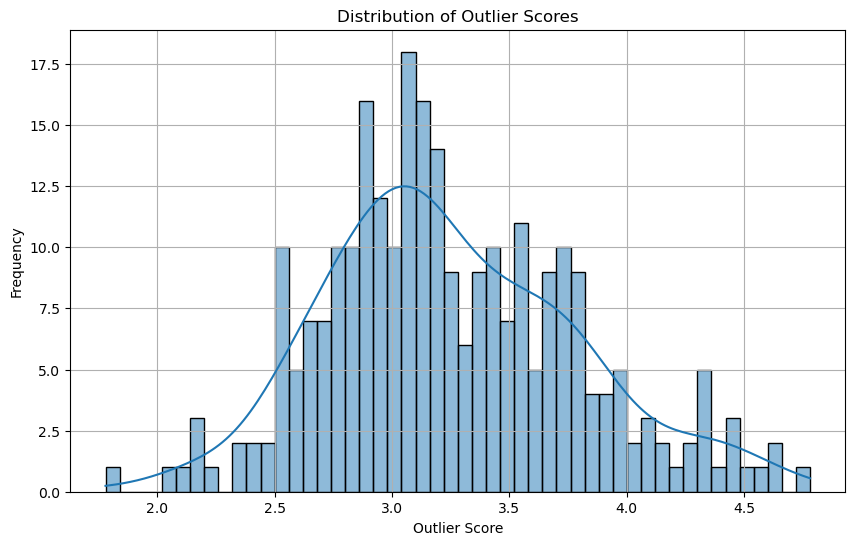

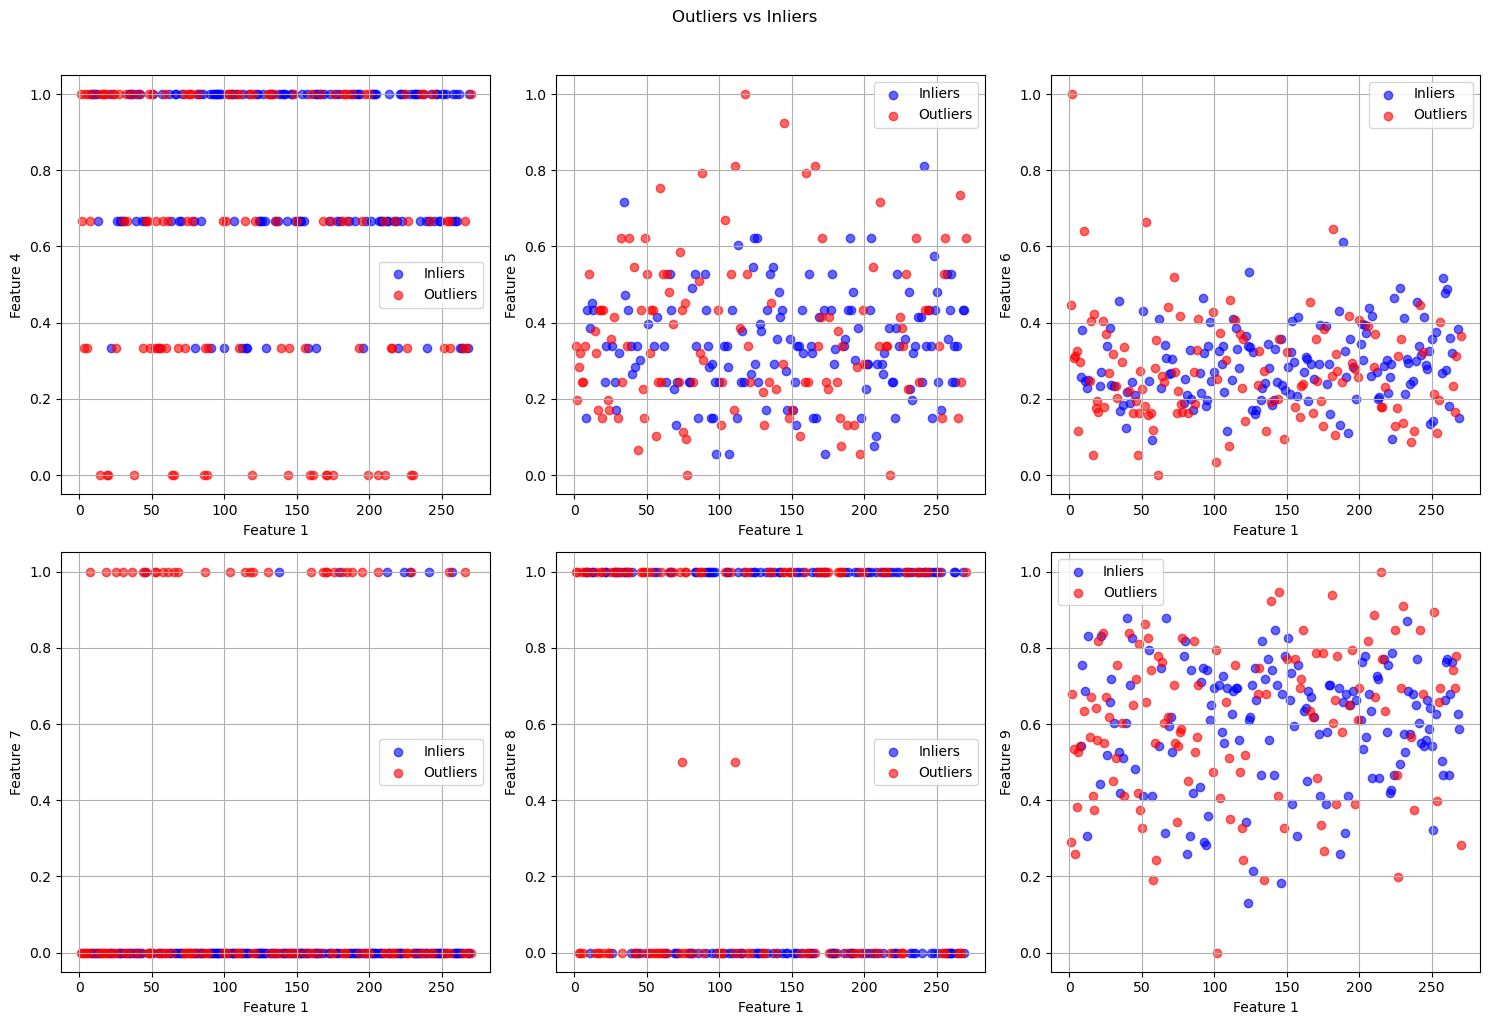

In [4]:
# Load and preprocess the dataset
df = load_arff_data(DATA_PATH)
X, y = preprocess_heart_disease_data(df, 'outlier')
print(X.shape)
print(y.shape)
print(df['outlier'].value_counts())
print(sum(y == 1))

# Initialize the AE1SVM model
ae1svm = AE1SVM(
    contamination=0.4444, 
    hidden_neurons=[64, 32], 
    hidden_activation='relu', 
    batch_size=32, 
    epochs=100, 
    learning_rate=0.001
)

# Train the AE1SVM model
ae1svm.fit(X)

print_banner("*", 72, "Training and Prediction")

# Get predictions
y_pred = ae1svm.labels_  # binary labels (0: inliers, 1: outliers)
outlier_scores = ae1svm.decision_scores_  # raw outlier scores

print_banner("*", 72, "Displaying Information")
# You can now analyze the results
print(f"Outliers detected: {sum(y_pred)} out of {len(y_pred)}")

# Getting the outlier indexes
outlier_indices = np.where(y_pred == 1)[0]

# Print the indexes of the outliers
print("Indices of the outliers:")
print(outlier_indices)

# Slice the data to have only the outliers
outliers_only = X.iloc[outlier_indices, :]
print(outliers_only.shape[0])

print_banner("*", 72, "Plotting")

# Plot the distribution of outlier scores
plt.figure(figsize=(10, 6))
sns.histplot(outlier_scores, bins=50, kde=True)
plt.title("Distribution of Outlier Scores")
plt.xlabel("Outlier Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot outlier scores against selected features
plot_outliers_vs_inliers(X, y_pred=y_pred, plot_features=[3, *range(4, 9)])